## K-means SKLEARN vs TENSORFLOW

### Sklearn

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
%matplotlib 

Using matplotlib backend: MacOSX


In [2]:
data = pd.read_csv('GOT_DataSet - DataSet.csv.csv')

In [3]:
data.head()

,S.No,actual,pred,alive,plod,name,title,male,culture,house,...,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,Lord of the seven kingdoms,1,Valyrian,NaN,...,0.0,0.0,NaN,0,0,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,House Frey,...,NaN,NaN,1.0,1,1,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Lord Commander,1,Valyrian,House Swyft,...,0.0,NaN,1.0,0,1,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen Consort,0,Andal,House Arryn,...,0.0,0.0,0.0,1,1,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,House Santagar,...,NaN,NaN,1.0,1,1,0,0,0,0.043478,1


In [4]:
selected_dataset = data[['actual', 'pred', 'alive', 'plod', 'male',
                        'numDeadRelations', 'boolDeadRelations', 'isPopular']]

In [5]:
GOT_dataset = selected_dataset.values

In [6]:
isPopular = selected_dataset[['isPopular']].values

In [13]:
t0 = time.time()
kmeans = KMeans(n_clusters=2, 
                random_state=0,
                n_init=1).fit_predict(GOT_dataset)
t_batch = time.time() - t0

In [8]:
# With kmeans set to fit
labels = kmeans.labels_

In [9]:
# with kmeans set to fit 
kmeans.cluster_centers_

array([[0.76423201, 0.71374866, 0.65302954, 0.34697046, 0.61331901,
        0.03920516, 0.03276047, 0.03276047],
       [0.33333333, 0.0952381 , 0.22305952, 0.77694048, 0.75      ,
        6.21428571, 1.        , 0.64285714]])

In [10]:
# with kmeans set to fit 
GOT_dataset[1]
kmeans.predict([[1, 0, 0.387, 0.613,1,1,1,1]])

array([0], dtype=int32)

In [14]:
### Test 
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = []
y_true = []
accuracy_score(y_true, y_pred, normalize=False)

0

Text(0.5,1,'kmeans')

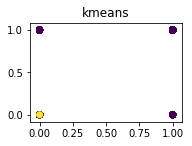

In [15]:
# with kmeans set in to fit_predict
plt.subplot(221)
plt.scatter(GOT_dataset[:, 0], GOT_dataset[:, 1], c=kmeans)
plt.title("kmeans")

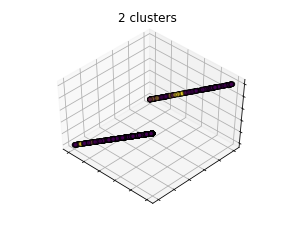

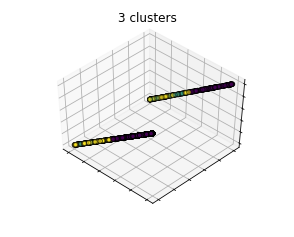

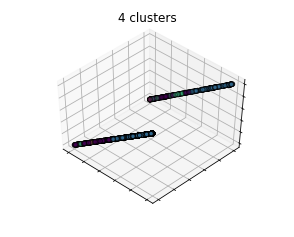

In [16]:
# with kmeans set to fit_predict 

estimators = [('kmeans_2', KMeans(n_clusters=2)),
              ('kmeans_3', KMeans(n_clusters=3)),
              ('kmeans_4', KMeans(n_clusters=4))]

fignum = 1
titles = ['2 clusters', '3 clusters', '4 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(GOT_dataset)
    labels = est.labels_

    ax.scatter(GOT_dataset[:, 3], GOT_dataset[:, 0], GOT_dataset[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_zlabel('')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

## TensorFlow

In [17]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
from tensorflow.contrib.factorization import KMeans

In [18]:
import os
os.environ["CUDA"] = ''

In [19]:
num_steps = 50
batch_size = 100
k = 2
num_classes = 2
num_features = 8

In [20]:

X = tf.placeholder(tf.float32, shape=[None, num_features])
Y = tf.placeholder(tf.int32, shape=[None, num_classes])


In [21]:

kmeans = KMeans(inputs=X, num_clusters=k, distance_metric='cosine',
                use_mini_batch=True)

In [22]:

(all_scores, cluster_idx, scores, cluster_centers_initialized, init_op,
train_op) = kmeans.training_graph()
cluster_idx = cluster_idx[0] 
avg_distance = tf.reduce_mean(scores)

init_vars = tf.global_variables_initializer()

Instructions for updating:
dim is deprecated, use axis instead


In [23]:
sess = tf.Session()

sess.run(init_vars, feed_dict={X: GOT_dataset})
sess.run(init_op, feed_dict={X: GOT_dataset})

for i in range(1, num_steps + 1):
    _, d, idx = sess.run([train_op, avg_distance, cluster_idx],
                         feed_dict={X: GOT_dataset})
    if i % 10 == 0 or i == 1:
        print("Step %i, Avg Distance: %f" % (i, d))

Step 1, Avg Distance: 0.198581
Step 10, Avg Distance: 0.122135
Step 20, Avg Distance: 0.122061
Step 30, Avg Distance: 0.122048
Step 40, Avg Distance: 0.122044
Step 50, Avg Distance: 0.122042


In [24]:

counts = np.zeros(shape=(k, num_classes))
for i in range(len(idx)):
    counts[idx[i]] += labels[i]

labels_map = [np.argmax(c) for c in counts]
labels_map = tf.convert_to_tensor(labels_map)

cluster_label = tf.nn.embedding_lookup(labels_map, cluster_idx)

correct_prediction = tf.equal(cluster_label, tf.cast(tf.argmax(Y, 1), tf.int32))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Test Model
#test_x, test_y = , 
#print("Test Accuracy:", sess.run(accuracy_op, feed_dict={X: test_x, Y: test_y}))